Hack Linguist

In [ ]:
import warnings
warnings.filterwarnings("ignore")

#Libraries for data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

#Algorithms to use
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

#Metrics to evaluate the model
from sklearn.metrics import confusion_matrix, classification_report, recall_score
from sklearn import metrics

#For hyperparameter tuning
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

## Import Dataset


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
dfst = pd.read_csv('/content/drive/MyDrive/Hackaton/Surveydata_train.csv') 
dftt = pd.read_csv('/content/drive/MyDrive/Hackaton/Traveldata_train.csv') 

In [ ]:
df_train = pd.merge(dfst, dftt, left_on = "ID", right_on = "ID")

In [ ]:
df_train.head()

,ID,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,...,Cleanliness,Online_Boarding,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
0,98800001,0,Needs Improvement,Green Car,Excellent,Excellent,Very Convenient,Good,Needs Improvement,Acceptable,...,Needs Improvement,Poor,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0
1,98800002,0,Poor,Ordinary,Excellent,Poor,Needs Improvement,Good,Poor,Good,...,Good,Good,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0
2,98800003,1,Needs Improvement,Green Car,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Excellent,...,Excellent,Excellent,Female,Loyal Customer,43.0,Business Travel,Business,1061,77.0,119.0
3,98800004,0,Acceptable,Ordinary,Needs Improvement,NaN,Needs Improvement,Acceptable,Needs Improvement,Acceptable,...,Acceptable,Acceptable,Female,Loyal Customer,44.0,Business Travel,Business,780,13.0,18.0
4,98800005,1,Acceptable,Ordinary,Acceptable,Acceptable,Manageable,Needs Improvement,Good,Excellent,...,Good,Good,Female,Loyal Customer,50.0,Business Travel,Business,1981,0.0,0.0


In [ ]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,94379.0,9.884719e+07,27245.014865,98800001.0,98823595.5,98847190.0,98870784.5,98894379.0
Overall_Experience,94379.0,5.466576e-01,0.497821,0.0,0.0,1.0,1.0,1.0
Age,94346.0,3.941965e+01,15.116632,7.0,27.0,40.0,51.0,85.0
Travel_Distance,94379.0,1.978888e+03,1027.961019,50.0,1359.0,1923.0,2538.0,6951.0
Departure_Delay_in_Mins,94322.0,1.464709e+01,38.138781,0.0,0.0,0.0,12.0,1592.0
Arrival_Delay_in_Mins,94022.0,1.500522e+01,38.439409,0.0,0.0,0.0,13.0,1584.0


In [ ]:
df_train.shape

(94379, 25)

In [ ]:
df_train.info

<bound method DataFrame.info of              ID  Overall_Experience       Seat_Comfort Seat_Class  \
0      98800001                   0  Needs Improvement  Green Car   
1      98800002                   0               Poor   Ordinary   
2      98800003                   1  Needs Improvement  Green Car   
3      98800004                   0         Acceptable   Ordinary   
4      98800005                   1         Acceptable   Ordinary   
...         ...                 ...                ...        ...   
94374  98894375                   0               Poor   Ordinary   
94375  98894376                   1               Good   Ordinary   
94376  98894377                   1  Needs Improvement  Green Car   
94377  98894378                   0  Needs Improvement   Ordinary   
94378  98894379                   0         Acceptable   Ordinary   

      Arrival_Time_Convenient           Catering  Platform_Location  \
0                   Excellent          Excellent    Very Convenient 

In [ ]:
df_train.head().T

,0,1,2,3,4
ID,98800001,98800002,98800003,98800004,98800005
Overall_Experience,0,0,1,0,1
Seat_Comfort,Needs Improvement,Poor,Needs Improvement,Acceptable,Acceptable
Seat_Class,Green Car,Ordinary,Green Car,Ordinary,Ordinary
Arrival_Time_Convenient,Excellent,Excellent,Needs Improvement,Needs Improvement,Acceptable
Catering,Excellent,Poor,Needs Improvement,NaN,Acceptable
Platform_Location,Very Convenient,Needs Improvement,Needs Improvement,Needs Improvement,Manageable
Onboard_Wifi_Service,Good,Good,Needs Improvement,Acceptable,Needs Improvement
Onboard_Entertainment,Needs Improvement,Poor,Good,Needs Improvement,Good
Online_Support,Acceptable,Good,Excellent,Acceptable,Excellent


In [ ]:
df_train.dtypes


ID                           int64
Overall_Experience           int64
Seat_Comfort                object
Seat_Class                  object
Arrival_Time_Convenient     object
Catering                    object
Platform_Location           object
Onboard_Wifi_Service        object
Onboard_Entertainment       object
Online_Support              object
Ease_of_Online_Booking      object
Onboard_Service             object
Legroom                     object
Baggage_Handling            object
CheckIn_Service             object
Cleanliness                 object
Online_Boarding             object
Gender                      object
Customer_Type               object
Age                        float64
Type_Travel                 object
Travel_Class                object
Travel_Distance              int64
Departure_Delay_in_Mins    float64
Arrival_Delay_in_Mins      float64
dtype: object

In [ ]:
df_train['Seat_Comfort'] = pd.Categorical(df_train['Seat_Comfort'])
print(df_train['Seat_Comfort'].unique())


['Needs Improvement', 'Poor', 'Acceptable', 'Good', 'Excellent', 'Extremely Poor', NaN]
Categories (6, object): ['Acceptable', 'Excellent', 'Extremely Poor', 'Good', 'Needs Improvement',
                         'Poor']


In [ ]:
cat_col = list(df_train.select_dtypes("object").columns)
for column in cat_col:
    print(df_train[column].value_counts(normalize=True))
    print("-" * 50)


Green Car    0.502601
Ordinary     0.497399
Name: Seat_Class, dtype: float64
--------------------------------------------------
Good                 0.229072
Excellent            0.206954
Acceptable           0.177615
Needs Improvement    0.175426
Poor                 0.160236
Extremely Poor       0.050697
Name: Arrival_Time_Convenient, dtype: float64
--------------------------------------------------
Acceptable           0.215652
Needs Improvement    0.209930
Good                 0.209825
Poor                 0.161821
Excellent            0.157115
Extremely Poor       0.045657
Name: Catering, dtype: float64
--------------------------------------------------
Manageable           0.256208
Convenient           0.232244
Needs Improvement    0.189000
Inconvenient         0.174342
Very Convenient      0.148184
Very Inconvenient    0.000021
Name: Platform_Location, dtype: float64
--------------------------------------------------
Good                 0.242027
Excellent            0.222239
Ac

In [ ]:
# checking the number of unique values
df_train["ID"].nunique()

94379

In [ ]:
for col in df_train.columns:
    df_train[col].fillna(value=df_train[col].mode()[0], inplace=True)

Overall_Experience


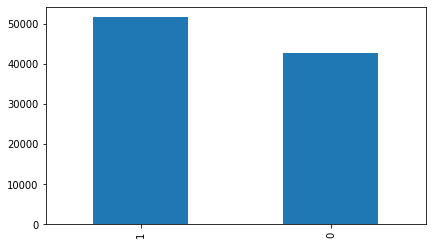

Seat_Comfort


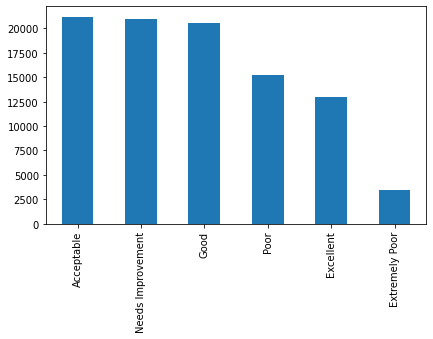

Seat_Class


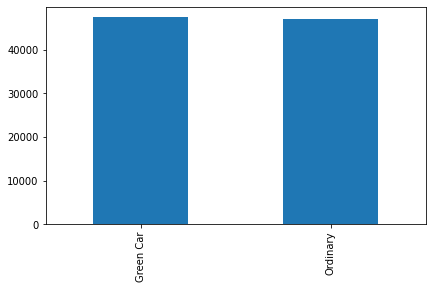

Arrival_Time_Convenient


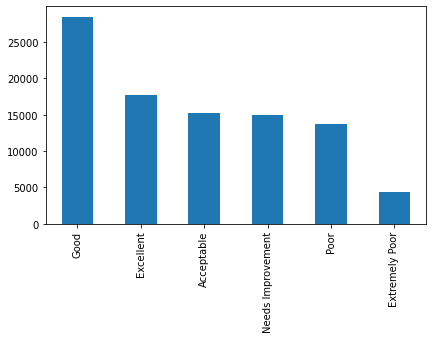

Catering


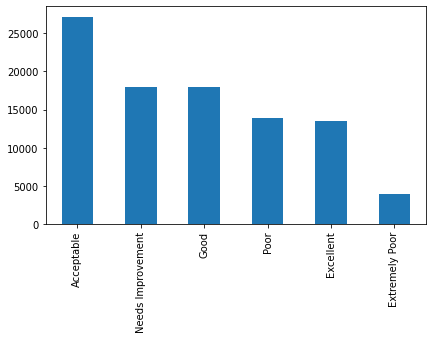

Platform_Location


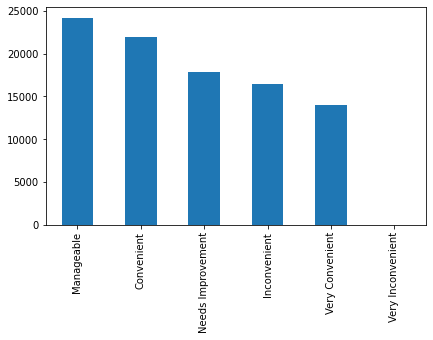

Onboard_Wifi_Service


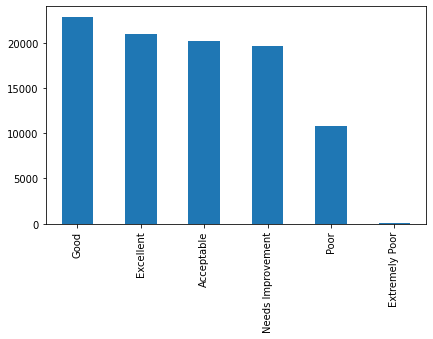

Onboard_Entertainment


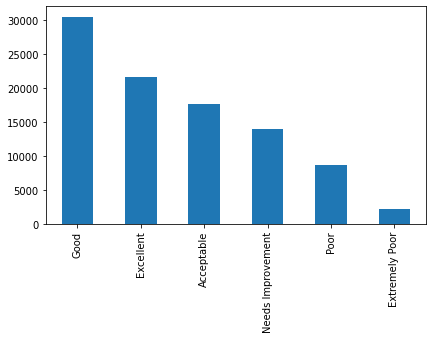

Online_Support


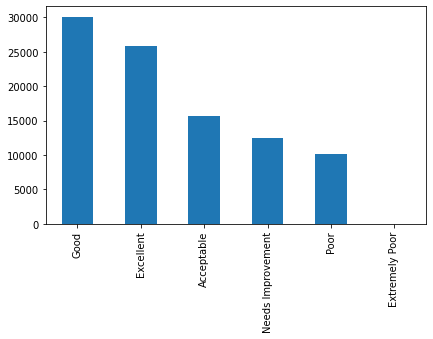

Ease_of_Online_Booking


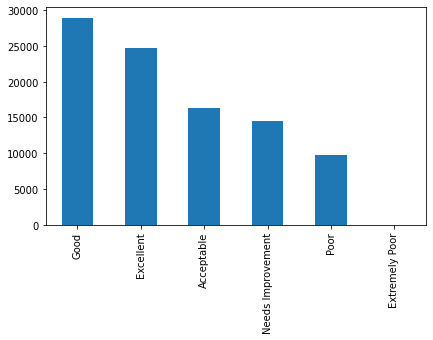

Onboard_Service


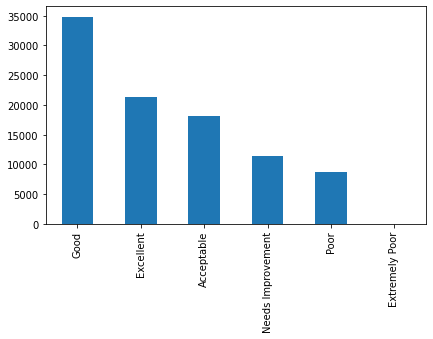

Legroom


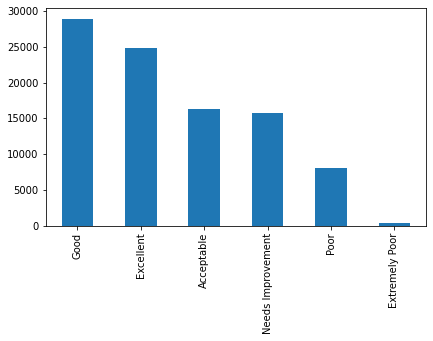

Baggage_Handling


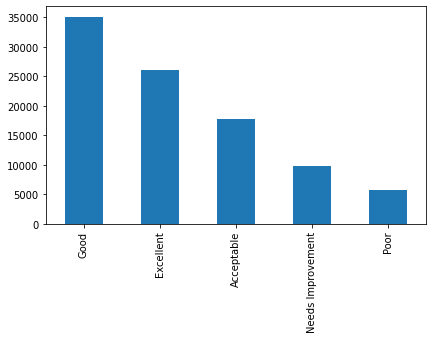

CheckIn_Service


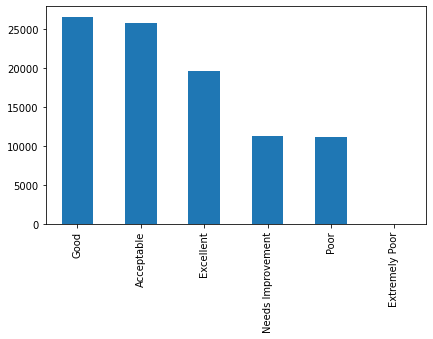

Cleanliness


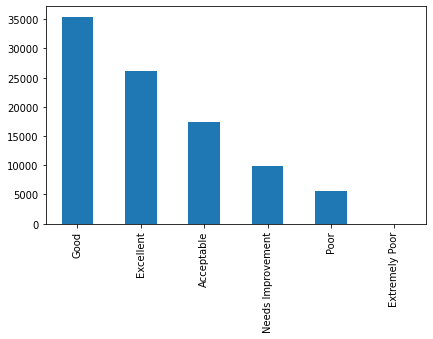

Online_Boarding


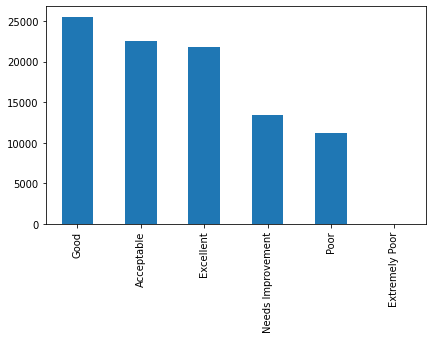

In [ ]:
for col in ['Overall_Experience',	'Seat_Comfort',	'Seat_Class',	'Arrival_Time_Convenient', 'Catering',	
            'Platform_Location',	'Onboard_Wifi_Service',	'Onboard_Entertainment',	'Online_Support',	'Ease_of_Online_Booking',	
            'Onboard_Service',	'Legroom',	'Baggage_Handling',	'CheckIn_Service',	'Cleanliness',	'Online_Boarding']:
    print(col)
    plt.figure(figsize=(15,4))
    plt.ylabel('count')
    plt.subplot(1,2,2)
    df_train[col].value_counts().plot(kind='bar')
    plt.show()

Seat_Comfort


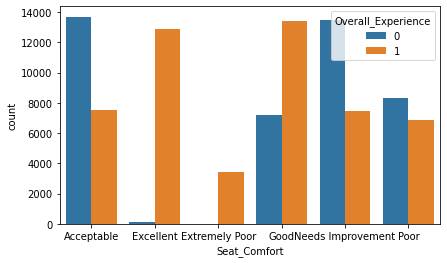

Seat_Class


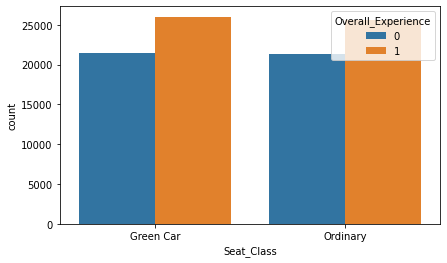

Arrival_Time_Convenient


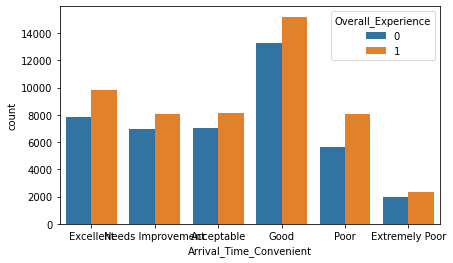

Catering


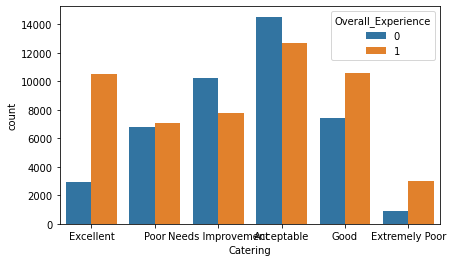

Platform_Location


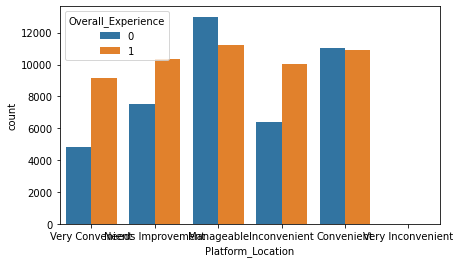

Onboard_Wifi_Service


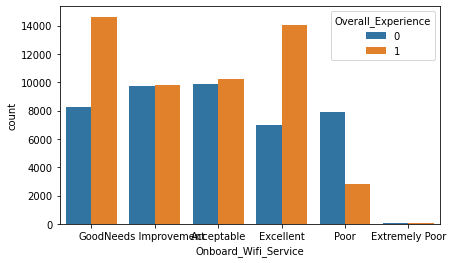

Onboard_Entertainment


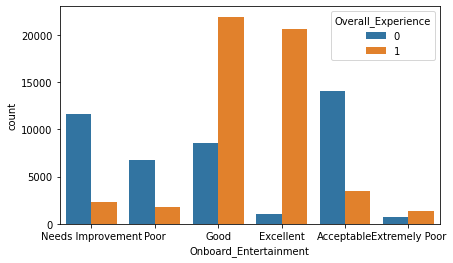

Online_Support


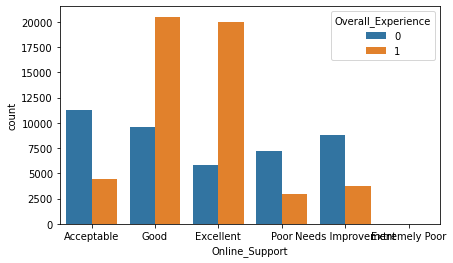

Ease_of_Online_Booking


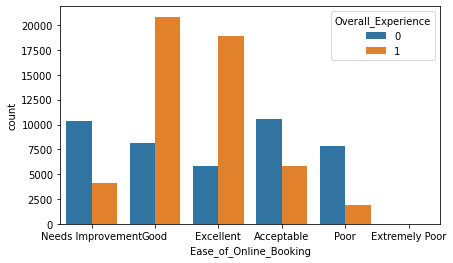

Onboard_Service


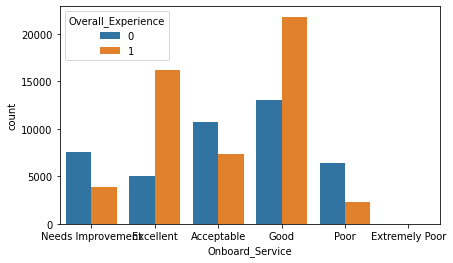

Legroom


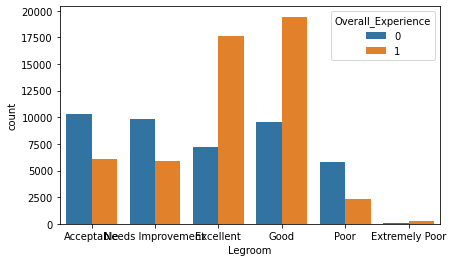

Baggage_Handling


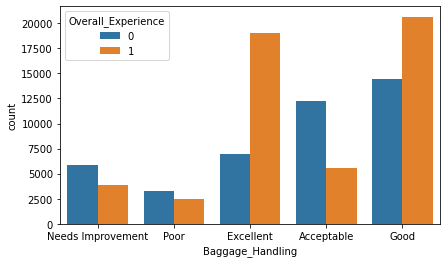

CheckIn_Service


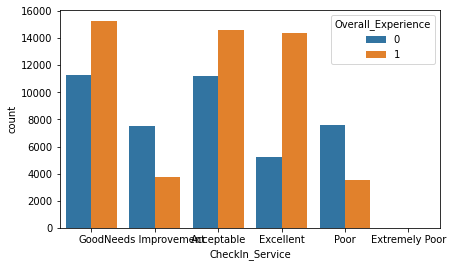

Cleanliness


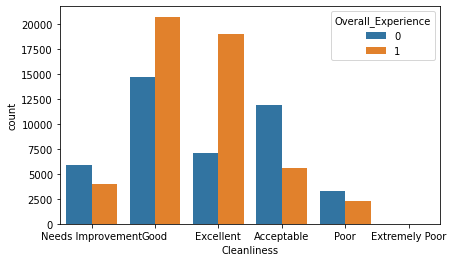

Online_Boarding


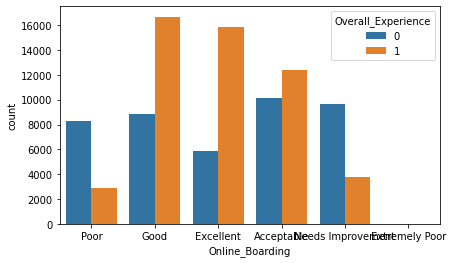

In [ ]:
for col in ['Seat_Comfort',	'Seat_Class',	'Arrival_Time_Convenient', 'Catering',	
            'Platform_Location',	'Onboard_Wifi_Service',	'Onboard_Entertainment',	'Online_Support',	'Ease_of_Online_Booking',	
            'Onboard_Service',	'Legroom',	'Baggage_Handling',	'CheckIn_Service',	'Cleanliness',	'Online_Boarding']:
  print(col)
  plt.figure(figsize=(15,4))
  plt.ylabel('Overall_Experiene')
  plt.subplot(1,2,2)
  sns.countplot(x=df_train[col], hue='Overall_Experience', data=df_train)
  plt.show()




In [ ]:
#function to print classification report and get confusion matrix in a proper format

def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Satisfied', 'Satisfied'], yticklabels=['Not Satisfied', 'Satisfied'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

In [ ]:
X=df_train.drop(columns='Overall_Experience')
Y=df_train['Overall_Experience']

In [ ]:
#Creating dummy variables 
#drop_first=True is used to avoid redundant variables
X = pd.get_dummies(X, drop_first=True)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X, Y, test_size=0.30, random_state=1)

In [ ]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (66065, 79)
Shape of test set :  (28314, 79)
Percentage of classes in training set:
1    0.545917
0    0.454083
Name: Overall_Experience, dtype: float64
Percentage of classes in test set:
1    0.548386
0    0.451614
Name: Overall_Experience, dtype: float64


In [ ]:
#Fitting the decision tree classifier on the training data
d_tree = DecisionTreeClassifier(random_state=1)

d_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29999
           1       1.00      1.00      1.00     36066

    accuracy                           1.00     66065
   macro avg       1.00      1.00      1.00     66065
weighted avg       1.00      1.00      1.00     66065



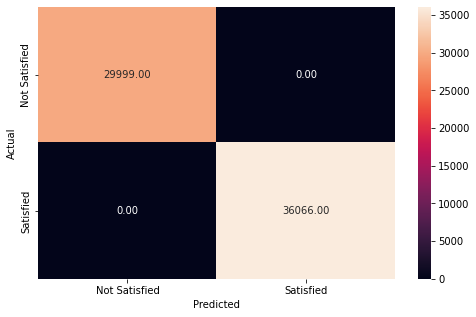

In [ ]:
#Checking performance on the training data
y_pred_train1 = d_tree.predict(X_train)
metrics_score(y_train,y_pred_train1)

              precision    recall  f1-score   support

           0       0.92      0.92      0.92     12787
           1       0.93      0.93      0.93     15527

    accuracy                           0.93     28314
   macro avg       0.93      0.93      0.93     28314
weighted avg       0.93      0.93      0.93     28314



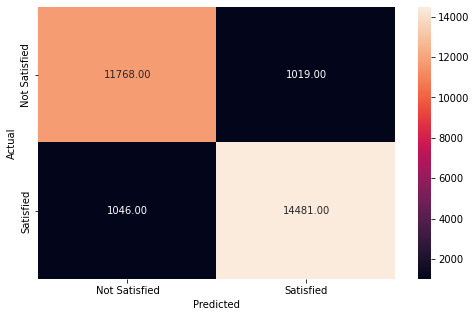

In [ ]:
#Checking performance on the testing data
y_pred_test1 = d_tree.predict(X_test)
metrics_score(y_test, y_pred_test1)

In [ ]:
# Choose the type of classifier 
d_tree_tuned = DecisionTreeClassifier(random_state=7, class_weight={0:0.3, 1:0.7})

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,10), 
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25]
             }

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label=1)

# Run the grid search
grid_obj = GridSearchCV(d_tree_tuned, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
d_tree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
d_tree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, max_depth=9,
                       min_samples_leaf=10, random_state=7)

              precision    recall  f1-score   support

           0       0.95      0.84      0.89     29999
           1       0.88      0.96      0.92     36066

    accuracy                           0.91     66065
   macro avg       0.91      0.90      0.90     66065
weighted avg       0.91      0.91      0.91     66065



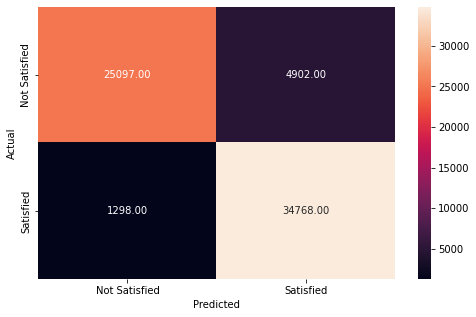

In [ ]:
#Checking performance on the training data
y_pred_train2 = d_tree_tuned.predict(X_train)
metrics_score(y_train,y_pred_train2)

              precision    recall  f1-score   support

           0       0.95      0.83      0.89     12787
           1       0.87      0.96      0.92     15527

    accuracy                           0.90     28314
   macro avg       0.91      0.90      0.90     28314
weighted avg       0.91      0.90      0.90     28314



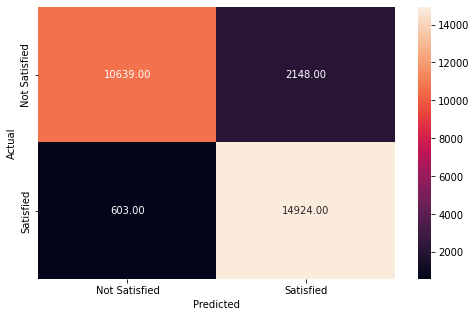

In [ ]:
#Checking performance on the testing data

y_pred_test2 = d_tree_tuned.predict(X_test)
metrics_score(y_test, y_pred_test2)

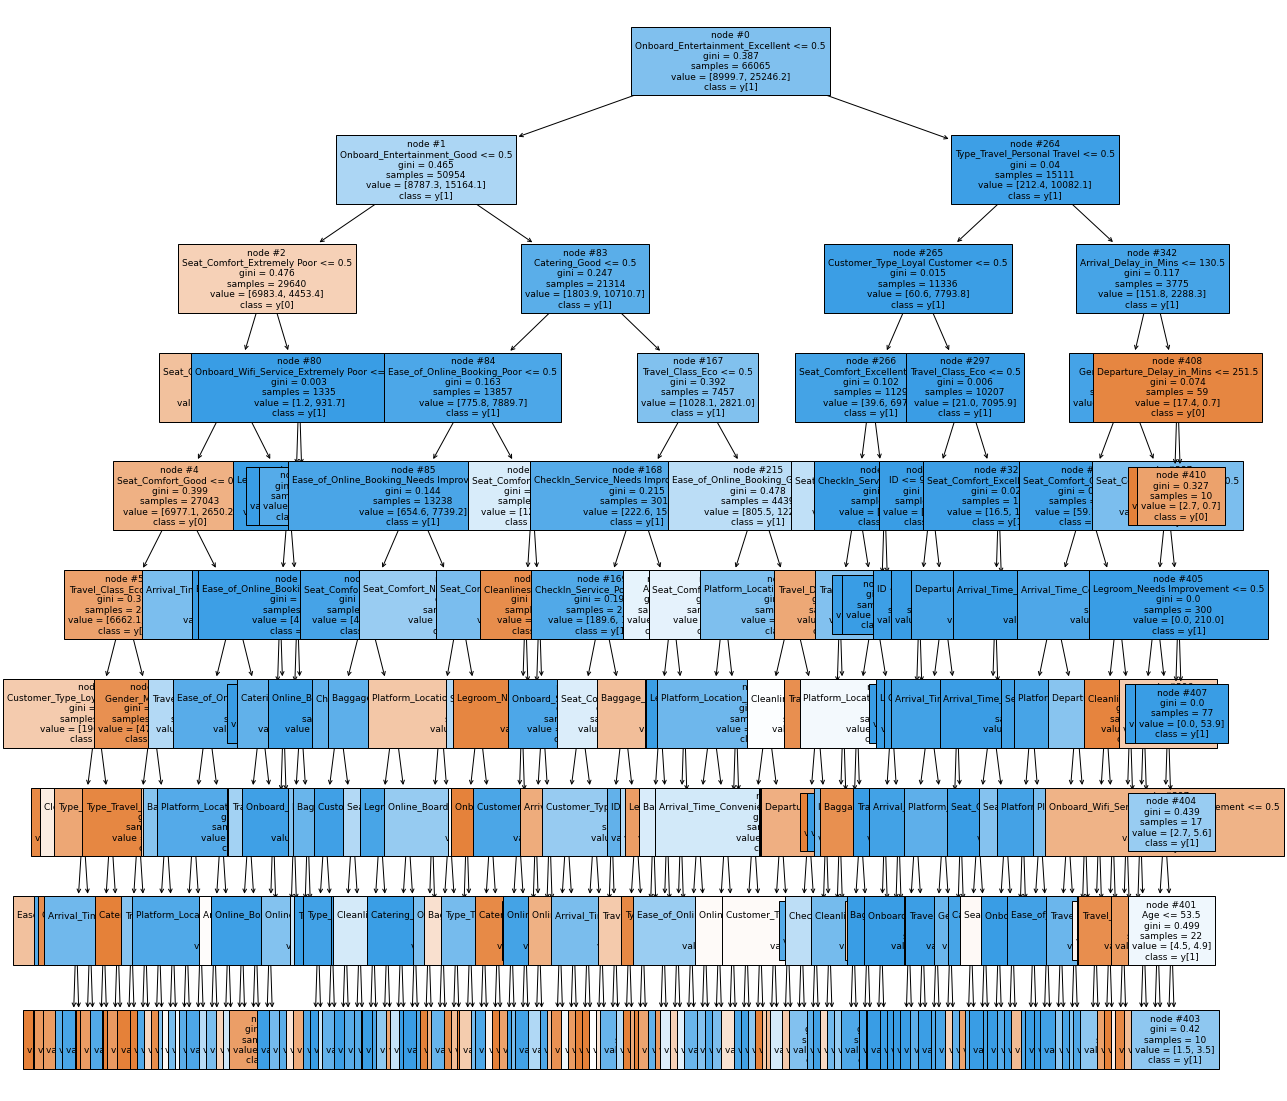

In [ ]:
features = list(X.columns)

plt.figure(figsize=(20,20))

tree.plot_tree(d_tree_tuned,feature_names=features,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [ ]:
# Importance of features in the tree building

print (pd.DataFrame(d_tree_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False).head(10))


                                      Imp
Onboard_Entertainment_Good       0.268262
Onboard_Entertainment_Excellent  0.178088
Seat_Comfort_Excellent           0.102455
Seat_Comfort_Extremely Poor      0.080289
Seat_Comfort_Good                0.077322
Travel_Class_Eco                 0.047695
Type_Travel_Personal Travel      0.036788
Ease_of_Online_Booking_Good      0.035912
Cleanliness_Excellent            0.027156
Customer_Type_Loyal Customer     0.021822


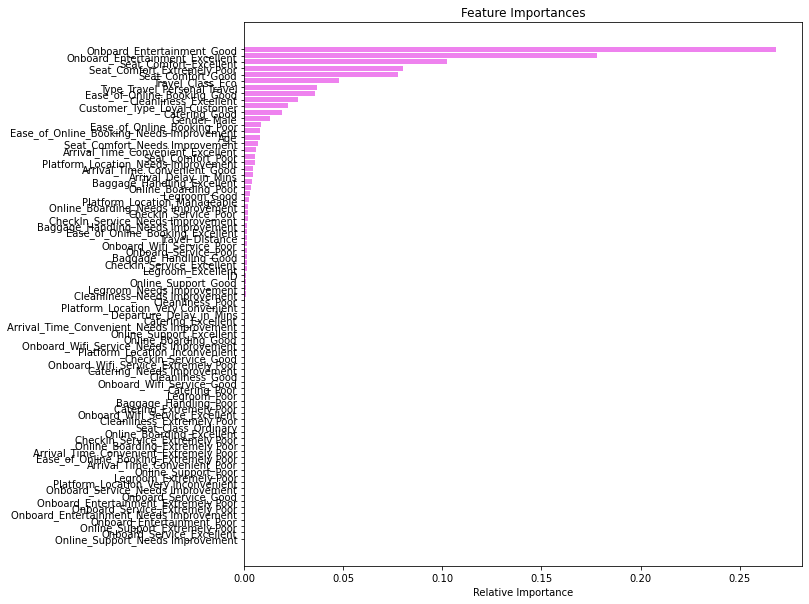

In [ ]:
#Plotting the feature importance
importances = d_tree_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
#Fitting the decision tree classifier on the training data
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29999
           1       1.00      1.00      1.00     36066

    accuracy                           1.00     66065
   macro avg       1.00      1.00      1.00     66065
weighted avg       1.00      1.00      1.00     66065



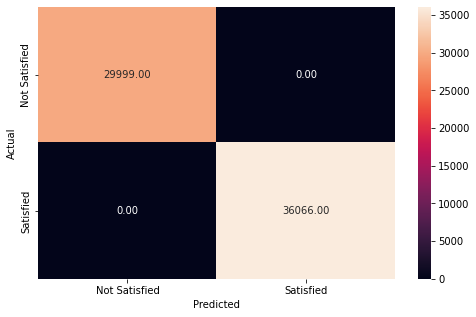

In [ ]:
#Checking performance on the training data
y_pred_train3 = y_pred_train3 = rf_estimator.predict(X_train)
metrics_score(y_train, y_pred_train3)

              precision    recall  f1-score   support

           0       0.93      0.95      0.94     12787
           1       0.96      0.94      0.95     15527

    accuracy                           0.95     28314
   macro avg       0.95      0.95      0.95     28314
weighted avg       0.95      0.95      0.95     28314



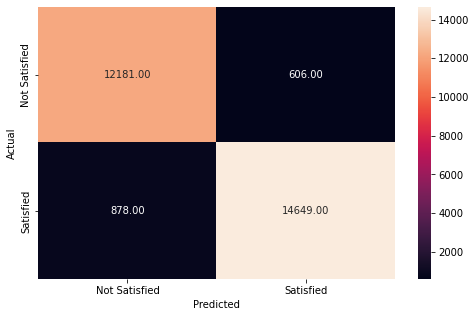

In [ ]:
#Checking performance on the testing data
y_pred_test3 = rf_estimator.predict(X_test)
metrics_score(y_test, y_pred_test3)

In [ ]:
# Choose the type of classifier
rf_estimator_tuned = RandomForestClassifier(criterion="entropy", random_state=7)

# Grid of parameters to choose from
parameters = {"n_estimators": [20, 30, 40],
    "max_depth": [10, 15, 20],
    "max_features": [0.8, 0.9, 1]
             }

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label=1)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

In [ ]:
#Fitting the best algorithm to the training data
rf_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=20, max_features=0.8,
                       n_estimators=40, random_state=7)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     29999
           1       1.00      0.99      0.99     36066

    accuracy                           0.99     66065
   macro avg       0.99      0.99      0.99     66065
weighted avg       0.99      0.99      0.99     66065



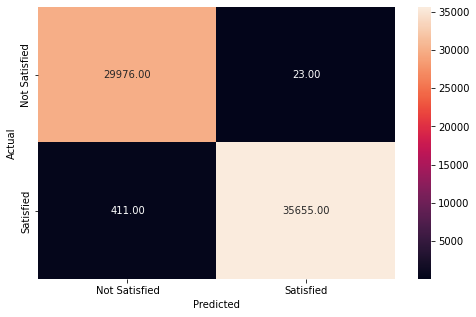

In [ ]:
#Checking performance on the training data
y_pred_train4 = rf_estimator_tuned.predict(X_train)
metrics_score(y_train, y_pred_train4)

              precision    recall  f1-score   support

           0       0.93      0.96      0.94     12787
           1       0.96      0.94      0.95     15527

    accuracy                           0.95     28314
   macro avg       0.95      0.95      0.95     28314
weighted avg       0.95      0.95      0.95     28314



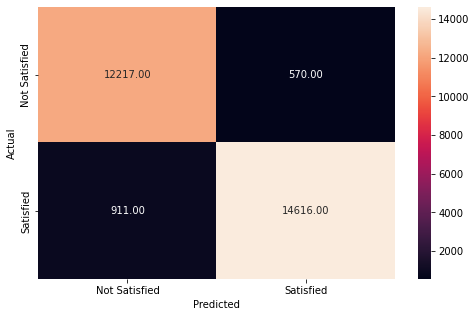

In [ ]:
#Checking performance on the training data
y_pred_test4 = rf_estimator_tuned.predict(X_test)
metrics_score(y_test, y_pred_test4)

In [ ]:
dfssu = pd.read_csv('/content/drive/MyDrive/Hackaton/Surveydata_test.csv') 
dfsst = pd.read_csv('/content/drive/MyDrive/Hackaton/Traveldata_test.csv') 

In [ ]:
df_test = pd.merge(dfssu, dfsst, left_on = "ID", right_on = "ID")

In [ ]:
for col in df_test.columns:
    df_test[col].fillna(value=df_test[col].mode()[0], inplace=True)

In [ ]:
df_test.head()

,ID,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,...,Cleanliness,Online_Boarding,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
0,99900001,Acceptable,Green Car,Acceptable,Acceptable,Manageable,Needs Improvement,Excellent,Good,Excellent,...,Excellent,Poor,Female,Loyal Customer,36.0,Business Travel,Business,532,0.0,0.0
1,99900002,Extremely Poor,Ordinary,Good,Poor,Manageable,Acceptable,Poor,Acceptable,Acceptable,...,Excellent,Acceptable,Female,Disloyal Customer,21.0,Business Travel,Business,1425,9.0,28.0
2,99900003,Excellent,Ordinary,Excellent,Excellent,Very Convenient,Excellent,Excellent,Excellent,Needs Improvement,...,Needs Improvement,Excellent,Male,Loyal Customer,60.0,Business Travel,Business,2832,0.0,0.0
3,99900004,Acceptable,Green Car,Excellent,Acceptable,Very Convenient,Poor,Acceptable,Excellent,Poor,...,Excellent,Poor,Female,Loyal Customer,29.0,Personal Travel,Eco,1352,0.0,0.0
4,99900005,Excellent,Ordinary,Extremely Poor,Excellent,Needs Improvement,Excellent,Excellent,Excellent,Excellent,...,Excellent,Excellent,Male,Disloyal Customer,18.0,Business Travel,Business,1610,17.0,0.0


In [ ]:
for col in df_test.columns:
    df_test[col].fillna(value=df_test[col].mode()[0], inplace=True)